# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = study_results.merge(mouse_metadata, on = "Mouse ID", how = "left" )
study_complete.head(5)
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_list = list(study_complete["Mouse ID"].unique())
mouse_count = len(mouse_list)
mouse_count


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
 

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_list = []
dup = study_complete.duplicated(subset = ["Mouse ID","Timepoint"], keep = False)
for x in dup.index:
    if dup.iloc[x] == True:
        dup_list.append(x)
dup_vals = study_complete.iloc[dup_list]  
dup_vals

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = study_complete.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
clean_study.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_count = pd.Series(clean_study["Mouse ID"].unique()).count()
clean_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Tumor_mean = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Tumor_median = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_var = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_std = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_stem = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
 

Drug_sum = pd.concat([Tumor_mean, Tumor_median, Tumor_var, Tumor_std, Tumor_stem], keys = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance",
                                                                                           "Tumor Volume Std. Dev.", "Tumor Volume Std. Err"], axis = 1)

Drug_sum

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Tumor_agg = clean_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(['mean', 'median', 'var', 'std', 'sem'])
Tumor_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

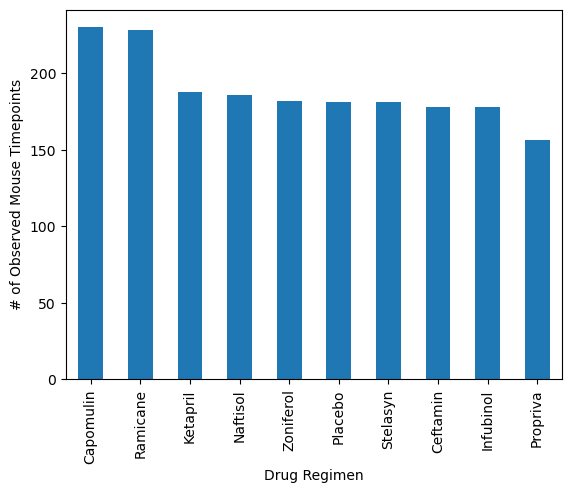

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

bar_chart = clean_study.groupby("Drug Regimen").count()

bar_chart["Mouse ID"].sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

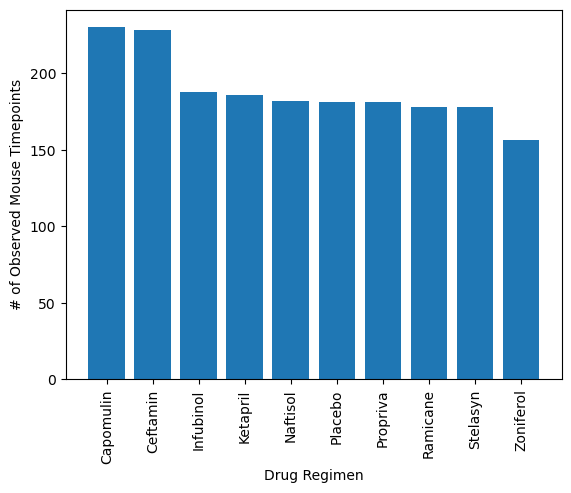

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_chart.index, bar_chart["Mouse ID"].sort_values(ascending = False), align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation =90)

<Axes: ylabel='Sex'>

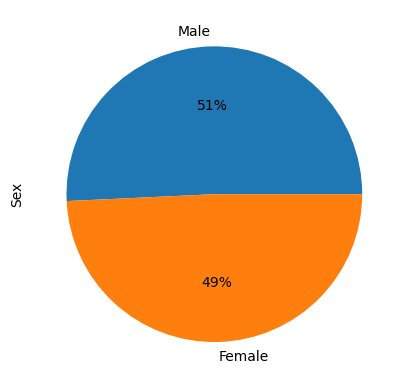

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = clean_study.groupby("Sex").count()
pie_chart["Mouse ID"].sort_values(ascending = False).plot(kind = "pie", ylabel = "Sex",autopct= '%1.0f%%' )


Text(0, 0.5, 'Sex')

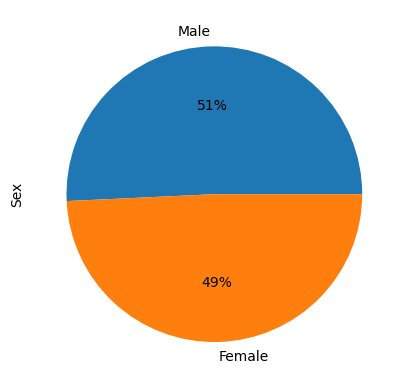

In [12]:
plt.pie(pie_chart["Mouse ID"].sort_values(ascending = False), autopct= '%1.0f%%', labels = ["Male", "Female"] )
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
mouse_time = clean_study.groupby("Mouse ID")["Timepoint"].max()
mouse_df = clean_study.merge(mouse_time, on = "Mouse ID", how = "right")
mouse_vol =  clean_study.merge(mouse_time, on = ["Mouse ID", "Timepoint"], how = "right")

mouse_vol
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [124]:
# Put treatments into a list for for loop (and later for plot labels)

mouse_drug = pd.DataFrame(mouse_vol.groupby("Drug Regimen")[["Mouse ID","Tumor Volume (mm3)"]])

#uses index values for individual data 
data = {}
drug_int = []
tumor_iqr = []
tumor_qnt = []

for e in mouse_drug.index:

    data[mouse_drug.iloc[e][0]] = mouse_drug.iloc[e][1].sort_values("Tumor Volume (mm3)")
    tumor_qnt.append(data[mouse_drug.iloc[e][0]]["Tumor Volume (mm3)"].quantile([0,.25, .5, .75,1]))
    drug_int.append(data[mouse_drug.iloc[e][0]])

    
drug_int





# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.



# Locate the rows which contain mice on each drug and get the tumor volumes

# add subset 
    
# Determine outliers using upper and lower bounds

[    Mouse ID  Tumor Volume (mm3)
 175     s185           23.343598
 122     m601           28.430964
 227     x401           28.484033
 61      f966           30.485985
 193     u364           31.023923
 240     y793           31.896238
 164     r554           32.377357
 125     m957           33.329098
 184     t565           34.455298
 221     w914           36.041047
 64      g288           37.074024
 84      i738           37.311846
 86      j119           38.125164
 88      j246           38.753265
 116     l897           38.846876
 24      b742           38.939633
 19      b128           38.982878
 209     w150           39.952347
 66      g316           40.159220
 205     v923           40.658124
 181     s710           40.728578
 109     l509           41.483008
 170     r944           41.581521
 163     r157           46.539206
 81      i557           47.685963,
     Mouse ID  Tumor Volume (mm3)
 224     x226           45.000000
 21      b447           45.000000
 190     u153

<function matplotlib.pyplot.show(close=None, block=None)>

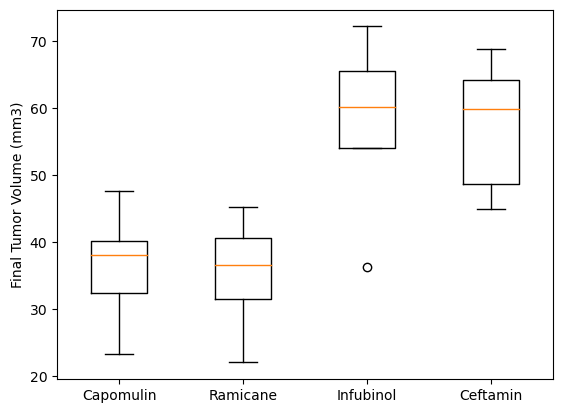

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_key = [tumor_qnt[0], tumor_qnt[7], tumor_qnt[2], tumor_qnt[1]]
plt.boxplot(box_key, labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

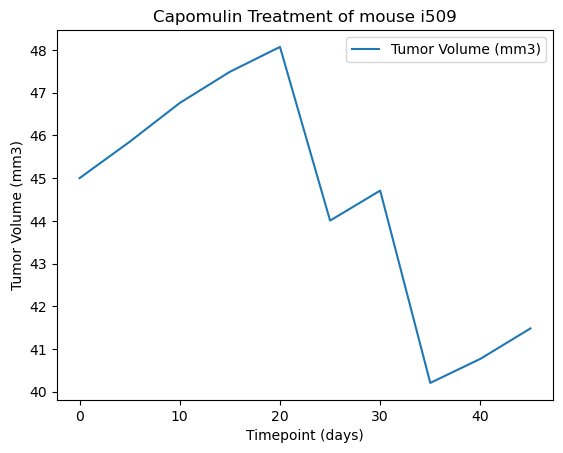

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ind = pd.DataFrame(mouse_df.groupby("Drug Regimen")[["Mouse ID","Timepoint_x","Tumor Volume (mm3)"]])
mouse_stat= pd.DataFrame(mouse_ind.iloc[0][1].groupby(mouse_ind.iloc[0][1]["Mouse ID"]))

# index 9 is mouse i509
spec_mouse = mouse_stat.iloc[9][1][["Timepoint_x", "Tumor Volume (mm3)"]]
spec_mouse.plot.line(x = "Timepoint_x", y = "Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse i509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

<function matplotlib.pyplot.show(close=None, block=None)>

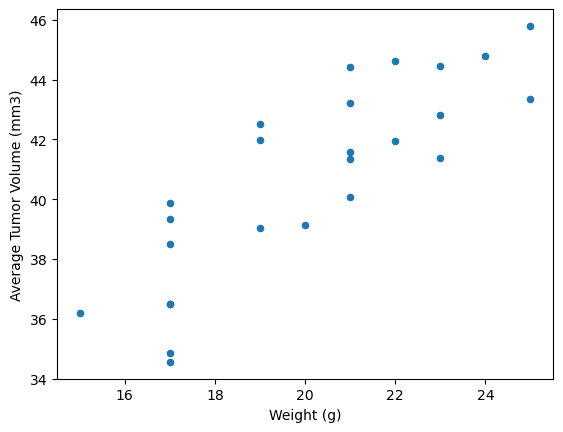

In [118]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight_stat = pd.DataFrame(mouse_df.groupby("Drug Regimen")[["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]])

# index 0 is Capomulin
scat_mouse = mouse_weight_stat.iloc[0][1][["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
avg_tum = pd.Series(scat_mouse.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
avg_weight = pd.Series(scat_mouse.groupby("Mouse ID")["Weight (g)"].mean())
scat = pd.concat([avg_tum, avg_weight], axis =1)
scat.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

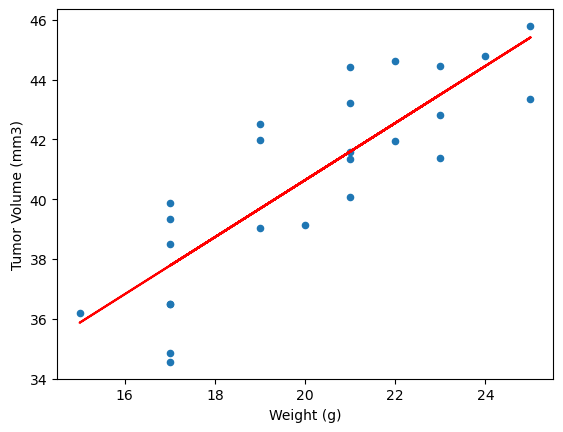

In [121]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(scat["Weight (g)"],scat["Tumor Volume (mm3)"] )
pe_fit = pe_slope * scat["Weight (g)"] + pe_int
scat.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.plot(scat["Weight (g)"],pe_fit,c ="red")
plt.show